# Visualize Data

## Import Libraries and Load Data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from mlxtend.plotting import plot_decision_regions

df = pd.read_csv('features.csv')

df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_324,feature_325,feature_326,feature_327,feature_328,feature_329,feature_330,feature_331,filename,label
0,-56.977673,121.174713,14.250343,9.940186,-9.083473,8.397256,2.610995,6.792240,4.381296,-2.736951,...,0.020458,0.085579,0.045430,0.002197,0.033090,0.004359,0.000831,0.010336,160bpm_viennawaltz_lose-control-teddy-smith-2_...,viennawaltz
1,-62.748940,87.038925,-6.274920,37.211754,-8.887174,10.059166,-7.267019,0.295249,-6.977261,5.036160,...,0.044078,-0.020233,0.026706,0.029991,0.089811,0.021100,0.006829,0.011846,XX126bpm_viennawaltz_john-runefeldt-3_part6.wav,viennawaltz
2,-275.536926,73.484207,32.951778,28.733213,13.815248,12.097575,5.667173,6.489179,0.587864,0.893188,...,0.072960,-0.079114,0.037680,0.022679,0.011716,0.045496,0.005773,0.004450,XXbpm_viennawaltz_ed-sheeran-dive-1_part5.wav,viennawaltz
3,-28.434404,115.384918,21.832369,14.130087,3.205397,13.381248,-5.109794,1.279989,-2.775912,10.471229,...,-0.002915,0.046735,0.030948,0.006934,0.036676,0.047253,0.006050,0.006805,XX171bpm_viennawaltz_Walzer-Provinz-2_part3.wav,viennawaltz
4,24.789967,73.626022,17.011192,20.260956,16.768995,4.641789,-7.913700,3.315585,-3.304436,2.685090,...,0.060837,-0.056792,0.012965,0.021688,0.016045,0.007902,0.002650,0.002767,XX180bpm_viennawaltz_lewis-capaldi-pointless-2...,viennawaltz


## Group Data by Label

In [13]:
# MFCCs: feature_0 to feature_25
mfcc_cols = [f'feature_{i}' for i in range(0, 26)]
# Chroma: feature_26 to feature_49
chroma_cols = [f'feature_{i}' for i in range(26, 50)]
# Mel: feature_50 to feature_305
mel_cols = [f'feature_{i}' for i in range(50, 306)]
# Contrast: feature_306 to feature_319
contrast_cols = [f'feature_{i}' for i in range(306, 320)]
# Tonnetz: feature_320 to feature_331
tonnetz_cols = [f'feature_{i}' for i in range(320, 332)]

feature_groups = {
    'MFCCs': mfcc_cols,
    'Chroma': chroma_cols,
    'Mel': mel_cols,
    'Contrast': contrast_cols,
    'Tonnetz': tonnetz_cols
}

feature_groups

{'MFCCs': ['feature_0',
  'feature_1',
  'feature_2',
  'feature_3',
  'feature_4',
  'feature_5',
  'feature_6',
  'feature_7',
  'feature_8',
  'feature_9',
  'feature_10',
  'feature_11',
  'feature_12',
  'feature_13',
  'feature_14',
  'feature_15',
  'feature_16',
  'feature_17',
  'feature_18',
  'feature_19',
  'feature_20',
  'feature_21',
  'feature_22',
  'feature_23',
  'feature_24',
  'feature_25'],
 'Chroma': ['feature_26',
  'feature_27',
  'feature_28',
  'feature_29',
  'feature_30',
  'feature_31',
  'feature_32',
  'feature_33',
  'feature_34',
  'feature_35',
  'feature_36',
  'feature_37',
  'feature_38',
  'feature_39',
  'feature_40',
  'feature_41',
  'feature_42',
  'feature_43',
  'feature_44',
  'feature_45',
  'feature_46',
  'feature_47',
  'feature_48',
  'feature_49'],
 'Mel': ['feature_50',
  'feature_51',
  'feature_52',
  'feature_53',
  'feature_54',
  'feature_55',
  'feature_56',
  'feature_57',
  'feature_58',
  'feature_59',
  'feature_60',
  'fea

# Boxplot

In [ ]:
for name, cols in feature_groups.items():
    X_group = df[cols].to_numpy()
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_group)
    df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    df_pca['label'] = df['label']

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y='PC1', data=df_pca)
    plt.title(f'Boxplot of PC1 for {name} Features')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y='PC2', data=df_pca)
    plt.title(f'Boxplot of PC2 for {name} Features')
    plt.show()

# Histogram

In [ ]:
for name, cols in feature_groups.items():
    X_group = df[cols].to_numpy()
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_group)
    df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    df_pca['label'] = df['label']

    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_pca, x="PC1", hue="label", bins=30, kde=True, alpha=0.6, element="step")
    plt.title(f'Histogram of PC1 for {name} Features')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_pca, x="PC2", hue="label", bins=30, kde=True, alpha=0.6, element="step")
    plt.title(f'Histogram of PC2 for {name} Features')
    plt.show()


# Scatter

In [ ]:
for name, cols in feature_groups.items():
    X_group = df[cols].to_numpy()
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_group)

    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['label'], palette="tab10", alpha=0.7)
    plt.title(f'PCA Scatter Plot: {name} Features')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(title="Label", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# SVC

In [ ]:
if 'label' in df.columns:
    from sklearn.svm import SVC
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    X = df[mfcc_cols + chroma_cols + mel_cols + contrast_cols + tonnetz_cols]
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    svc = SVC(kernel="rbf", C=20)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print('SVC Accuracy:', accuracy_score(y_test, y_pred))
else:
    print('No label column found. SVC cannot be trained.')

# Visualization Grid

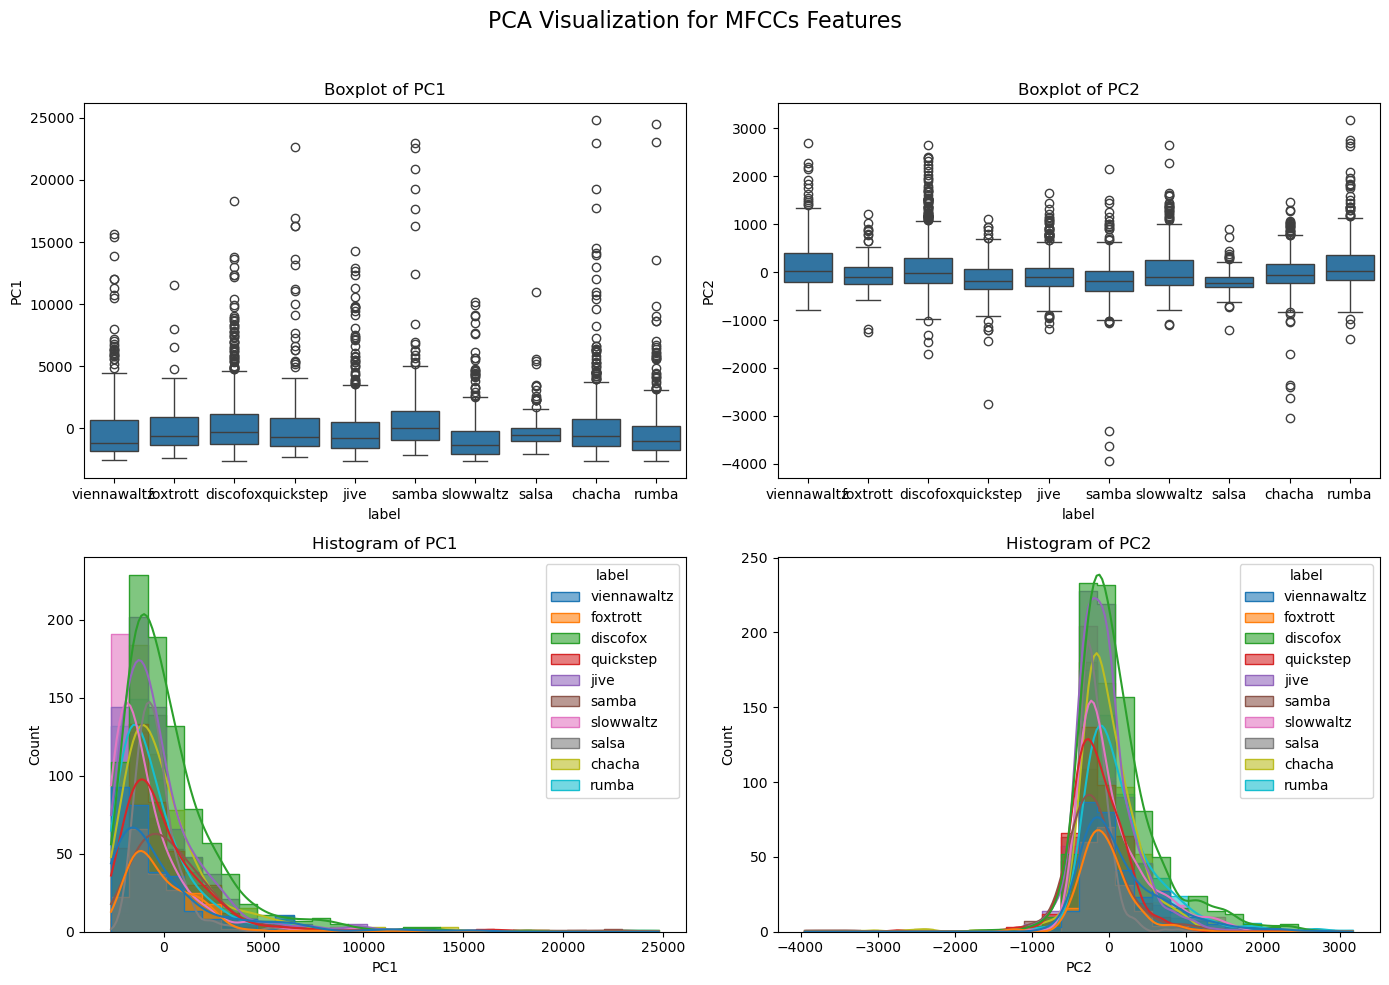

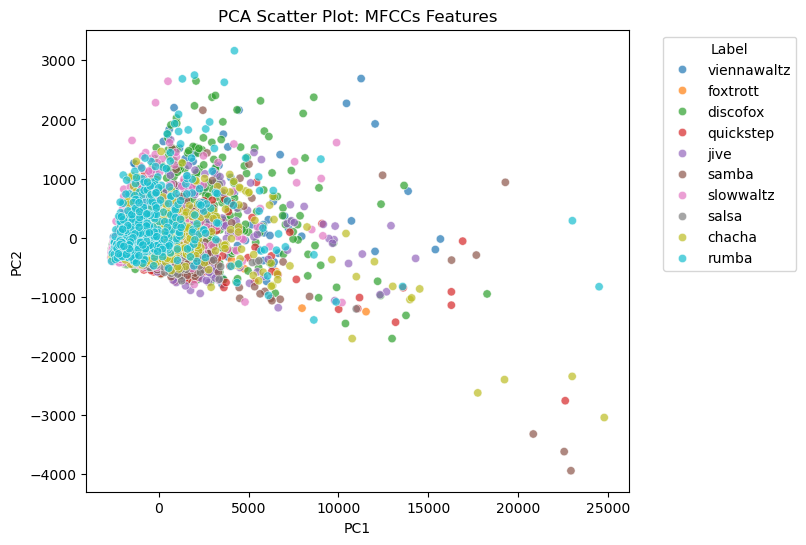

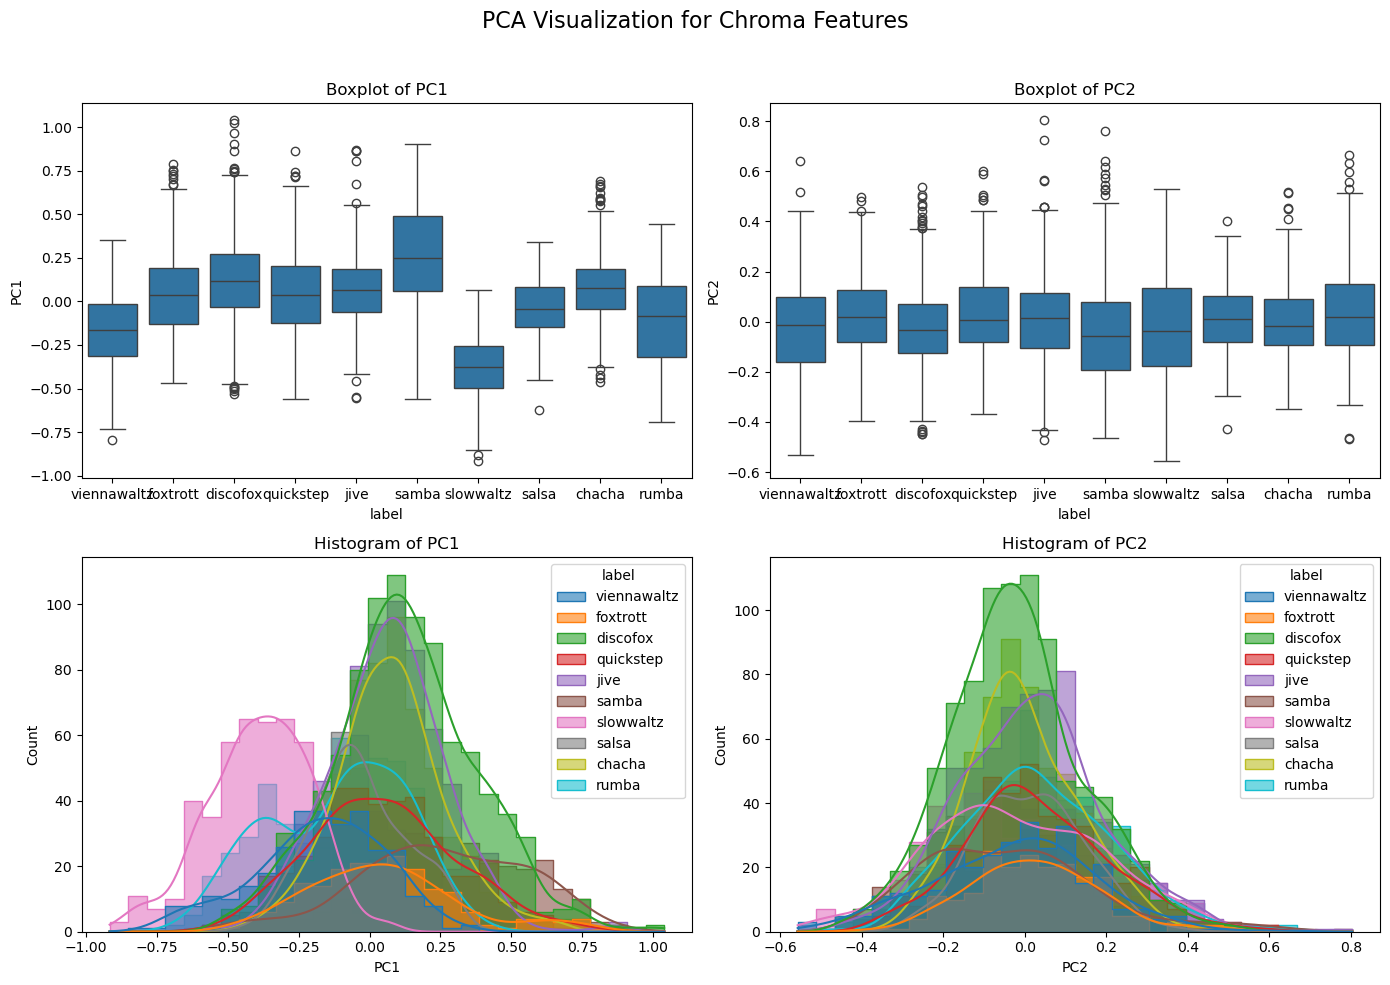

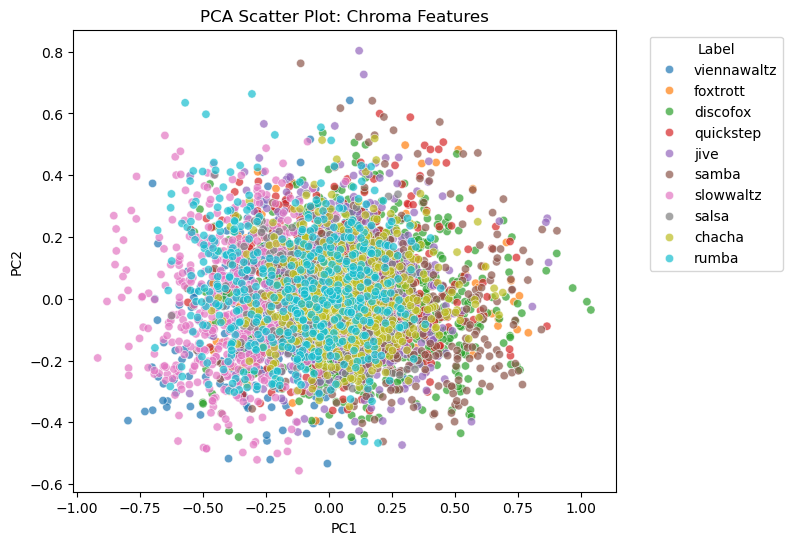

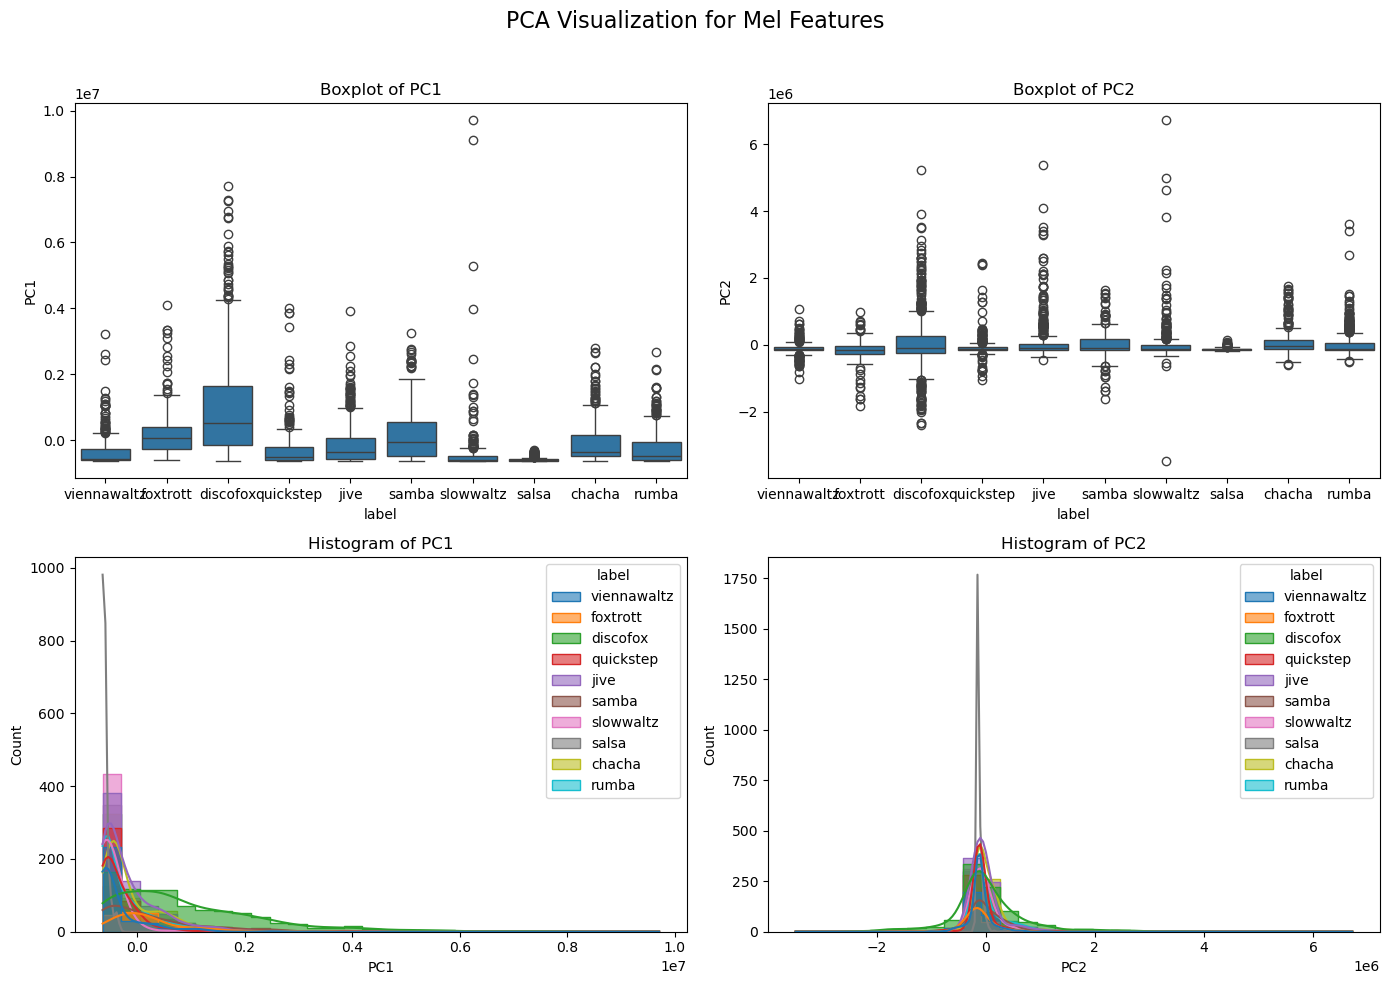

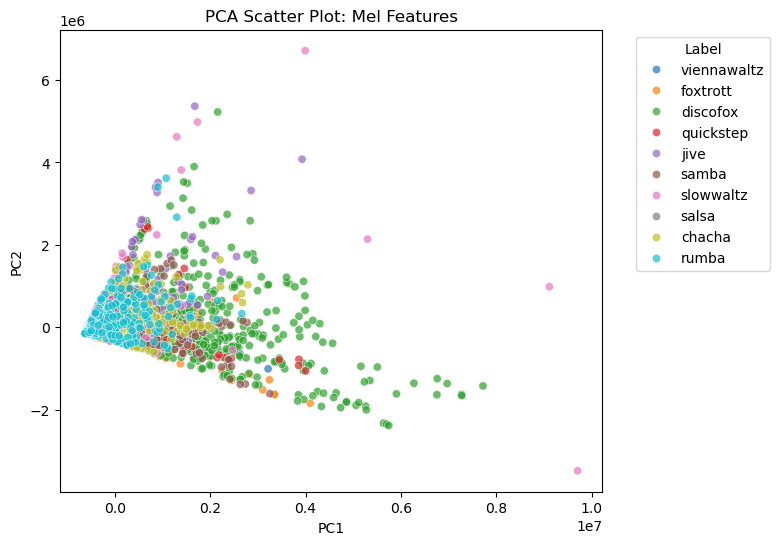

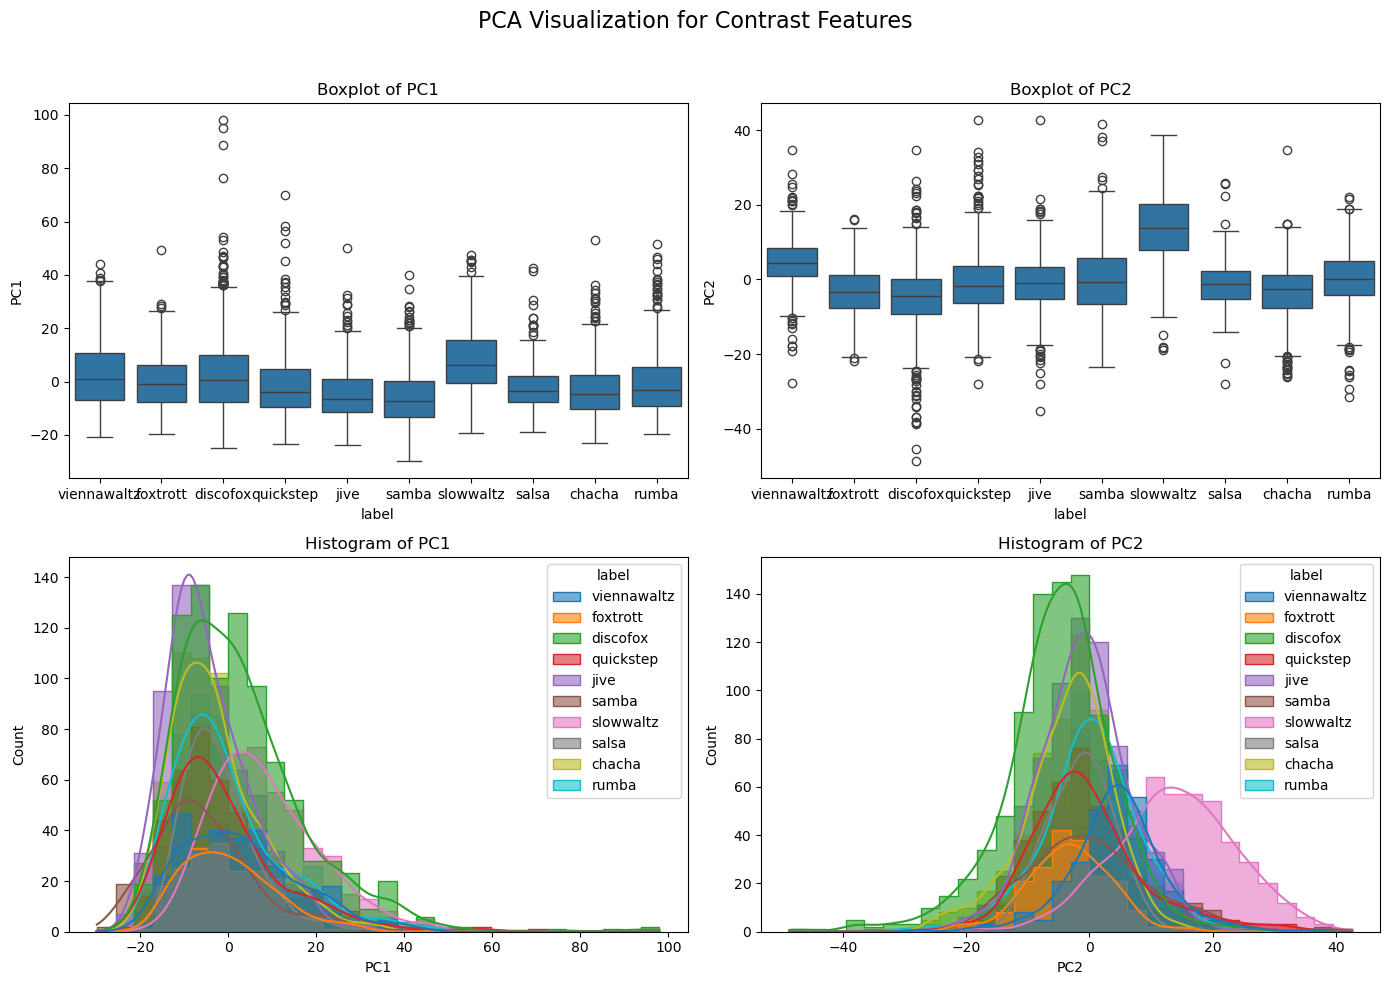

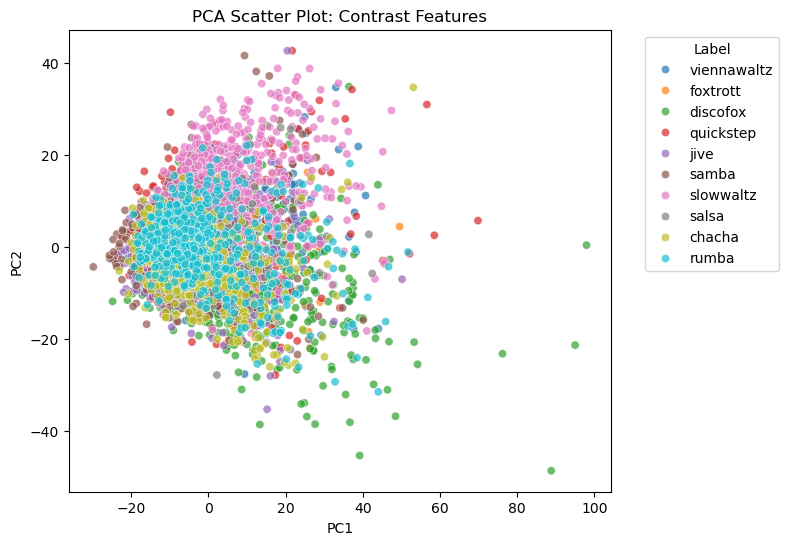

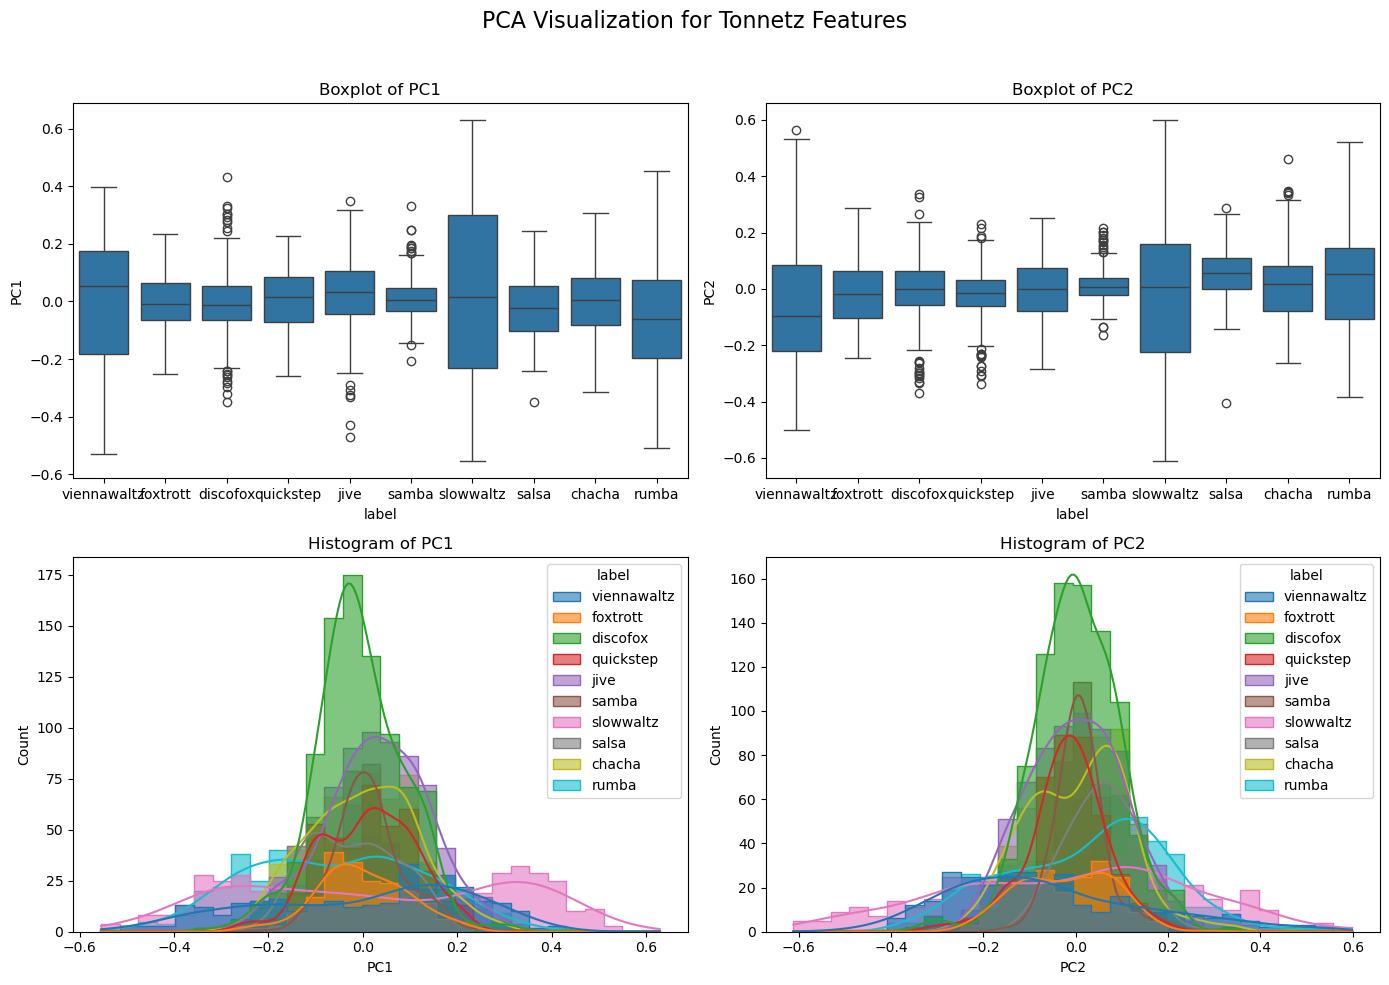

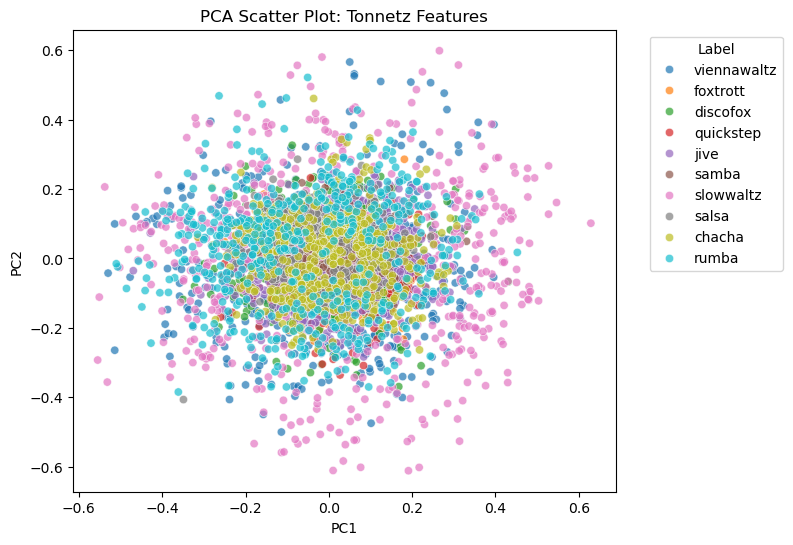

In [14]:
for name, cols in feature_groups.items():
    X_group = df[cols].to_numpy()
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform( X_group)
    df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    df_pca['label'] = df['label']

    # Create a grid of subplots (2x2 + 1)
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f"PCA Visualization for {name} Features", fontsize=16)

    # Boxplot PC1
    sns.boxplot(x='label', y='PC1', data=df_pca, ax=axes[0, 0])
    axes[0, 0].set_title('Boxplot of PC1')

    # Boxplot PC2
    sns.boxplot(x='label', y='PC2', data=df_pca, ax=axes[0, 1])
    axes[0, 1].set_title('Boxplot of PC2')

    # Histogram PC1
    sns.histplot(data=df_pca, x="PC1", hue="label", bins=30, kde=True, alpha=0.6, element="step", ax=axes[1, 0])
    axes[1, 0].set_title('Histogram of PC1')

    # Histogram PC2
    sns.histplot(data=df_pca, x="PC2", hue="label", bins=30, kde=True, alpha=0.6, element="step", ax=axes[1, 1])
    axes[1, 1].set_title('Histogram of PC2')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Separate scatter plot (large, below)
    plt.figure(figsize=(7, 6))
    sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue='label', palette="tab10", alpha=0.7)
    plt.title(f'PCA Scatter Plot: {name} Features')
    plt.legend(title="Label", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()